### Prediction model for survival in the Titanic

In [10]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [11]:
#reading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [12]:
train_missing=train.isna()
train_num_missing = train_missing.sum()
train_num_missing*100/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [3]:
sum(train.Survived)/len(train.Survived)

0.3838383838383838

In [4]:
# shape and data types of the data
print(train.shape)
print(train.dtypes)

# select numeric columns
df_numeric = train.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = train.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']
['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


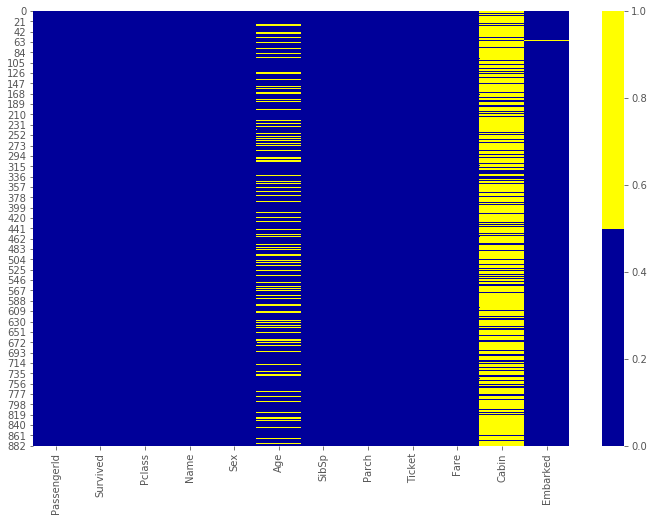

In [5]:
cols = train.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

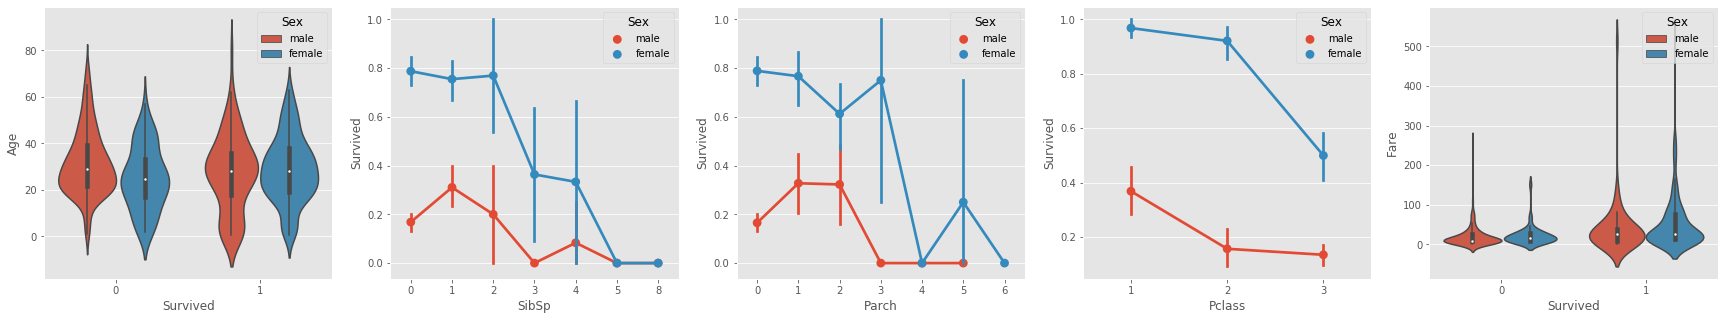

In [6]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=train, ax=axs[0])
sns.pointplot(x="SibSp", y="Survived", hue="Sex", data=train, ax=axs[1])
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=train, ax=axs[2])
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train, ax=axs[3])
sns.violinplot(x="Survived", y="Fare", hue="Sex", data=train, ax=axs[4])

In [7]:
train.replace({'male': 1, 'female': 0}, inplace=True)

In [8]:
train.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


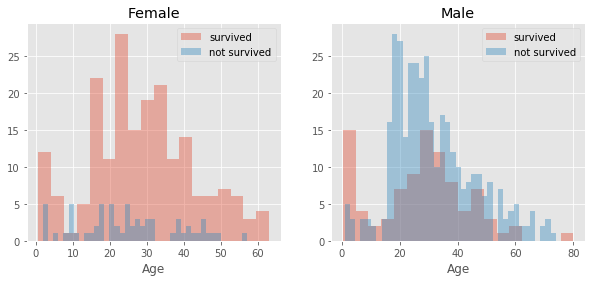

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']==0]
men = train[train['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
plt.show()